# Pretreatment 1

Pretreatment proposed by Anderson et al. (2020).

### References

Anderson, N., Walsh, K., Subedi, P., & Hayes, C. (2020). Achieving robustness across season, location and cultivar for a NIRS model for intact mango fruit dry matter content. Postharvest Biology and Technology, 168. https://doi.org/10.1016/j.postharvbio.2020.111202

## Setup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from matplotlib.ticker import MaxNLocator
from scipy.signal import savgol_filter

In [2]:
# read in prepared dataset from previous step
df = pd.read_pickle("../2_sample_selection/data/prepared/mango_dmc_and_spectra_v2.pkl")
wavelength_cols = df.filter(regex="^\d+", axis=1).columns
descriptive_cols = [col for col in df.columns if col not in wavelength_cols]
wavelength_cols = wavelength_cols.astype(int).tolist()
df.columns = descriptive_cols + wavelength_cols
df

,partition_1,outlier_flag_1,origin,population,date,season,region,cultivar,physio_stage,temp,...,1173,1176,1179,1182,1185,1188,1191,1194,1197,1200
0,train,0,published,100100,2015-09-27,2015,NT,caly,green,high,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,train,0,published,100100,2015-09-27,2015,NT,caly,green,high,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,train,0,published,100100,2015-09-27,2015,NT,caly,green,low,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,train,0,published,100100,2015-09-27,2015,NT,caly,green,low,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,train,0,published,100100,2015-09-27,2015,NT,caly,green,high,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88448,test,0,marcelo,200800,NaT,2021,QLD,keitt,green,undef,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
88449,test,0,marcelo,200800,NaT,2021,QLD,keitt,green,undef,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
88450,test,0,marcelo,200800,NaT,2021,QLD,keitt,green,undef,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
88451,test,0,marcelo,200800,NaT,2021,QLD,keitt,green,undef,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Wavelength Range

In [3]:
initial_wavelengths = [w for w in wavelength_cols if 309 <= w <= 1149]
final_wavelengths = [w for w in wavelength_cols if 684 <= w <= 990]

## Pretreatment

In [4]:
# Savitzky-Golay smoothing, 2nd deriv
p1 = df[initial_wavelengths].apply(
    lambda row: savgol_filter(
        x=row,
        window_length=17,
        polyorder=2,
        deriv=2
    ),
    axis=1,
    result_type="expand"
)
p1.columns = initial_wavelengths
p1

,309,312,315,318,321,324,327,330,333,336,...,1122,1125,1128,1131,1134,1137,1140,1143,1146,1149
0,0.000887,0.000887,0.000887,0.000887,0.000887,0.000887,0.000887,0.000887,0.000887,0.001719,...,0.002848,0.003100,0.003100,0.003100,0.003100,0.003100,0.003100,0.003100,0.003100,0.003100
1,0.000326,0.000326,0.000326,0.000326,0.000326,0.000326,0.000326,0.000326,0.000326,0.000602,...,0.002364,0.002815,0.002815,0.002815,0.002815,0.002815,0.002815,0.002815,0.002815,0.002815
2,-0.000962,-0.000962,-0.000962,-0.000962,-0.000962,-0.000962,-0.000962,-0.000962,-0.000962,-0.001526,...,0.002882,0.003195,0.003195,0.003195,0.003195,0.003195,0.003195,0.003195,0.003195,0.003195
3,-0.000655,-0.000655,-0.000655,-0.000655,-0.000655,-0.000655,-0.000655,-0.000655,-0.000655,0.000004,...,0.002872,0.003206,0.003206,0.003206,0.003206,0.003206,0.003206,0.003206,0.003206,0.003206
4,-0.003298,-0.003298,-0.003298,-0.003298,-0.003298,-0.003298,-0.003298,-0.003298,-0.003298,-0.001978,...,0.002865,0.003198,0.003198,0.003198,0.003198,0.003198,0.003198,0.003198,0.003198,0.003198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88448,-0.005066,-0.005066,-0.005066,-0.005066,-0.005066,-0.005066,-0.005066,-0.005066,-0.005066,0.003078,...,-0.005242,-0.007471,-0.007471,-0.007471,-0.007471,-0.007471,-0.007471,-0.007471,-0.007471,-0.007471
88449,0.022470,0.022470,0.022470,0.022470,0.022470,0.022470,0.022470,0.022470,0.022470,0.025134,...,-0.005066,-0.007286,-0.007286,-0.007286,-0.007286,-0.007286,-0.007286,-0.007286,-0.007286,-0.007286
88450,0.005757,0.005757,0.005757,0.005757,0.005757,0.005757,0.005757,0.005757,0.005757,0.008829,...,-0.006141,-0.008943,-0.008943,-0.008943,-0.008943,-0.008943,-0.008943,-0.008943,-0.008943,-0.008943
88451,-0.008176,-0.008176,-0.008176,-0.008176,-0.008176,-0.008176,-0.008176,-0.008176,-0.008176,-0.001573,...,-0.005935,-0.008182,-0.008182,-0.008182,-0.008182,-0.008182,-0.008182,-0.008182,-0.008182,-0.008182


### Visualise Pretreatments

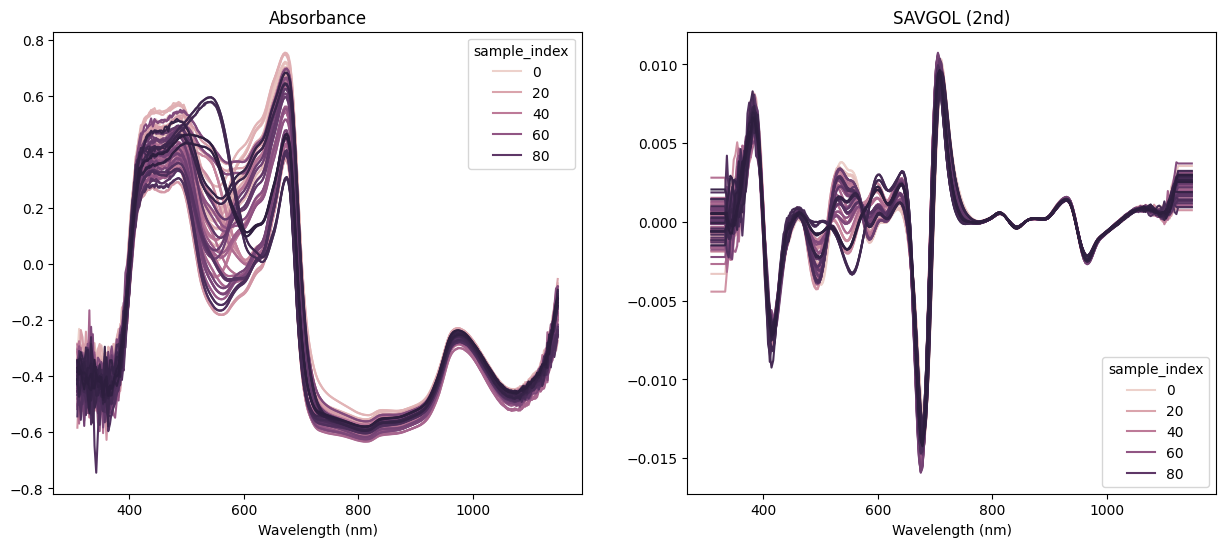

In [5]:
first_n_samples = 100
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

def plot_data(data, ax, title, xlabel):
    plot = sns.lineplot(
        data=(data[:first_n_samples]
              .reset_index(names="sample_index")
              .melt(id_vars="sample_index", var_name="wavelength", value_name="absorbance")),
        x="wavelength", y="absorbance", hue="sample_index", ax=ax
    )
    plot.set(title=title, xlabel=xlabel, ylabel=None)
    plot.xaxis.set_major_locator(MaxNLocator(nbins=6))

# Absorbance
plot_data(df[initial_wavelengths], axs[0], "Absorbance", "Wavelength (nm)")

# Savitzky-Golay smoothing, 2nd deriv
plot_data(p1, axs[1], "SAVGOL (2nd)", "Wavelength (nm)")

plt.show()

## Prepare final dataset

In [6]:
df_final = pd.concat(
    objs=[
        df[descriptive_cols],
        p1[final_wavelengths].add_suffix("_savgol_d2"),
    ],
    axis=1
)
df_final

,partition_1,outlier_flag_1,origin,population,date,season,region,cultivar,physio_stage,temp,...,963_savgol_d2,966_savgol_d2,969_savgol_d2,972_savgol_d2,975_savgol_d2,978_savgol_d2,981_savgol_d2,984_savgol_d2,987_savgol_d2,990_savgol_d2
0,train,0,published,100100,2015-09-27,2015,NT,caly,green,high,...,-0.002284,-0.002370,-0.002319,-0.002167,-0.001931,-0.001664,-0.001437,-0.001224,-0.001095,-0.001008
1,train,0,published,100100,2015-09-27,2015,NT,caly,green,high,...,-0.002294,-0.002360,-0.002297,-0.002137,-0.001910,-0.001666,-0.001444,-0.001268,-0.001123,-0.001012
2,train,0,published,100100,2015-09-27,2015,NT,caly,green,low,...,-0.002539,-0.002598,-0.002525,-0.002361,-0.002106,-0.001810,-0.001529,-0.001289,-0.001107,-0.000965
3,train,0,published,100100,2015-09-27,2015,NT,caly,green,low,...,-0.002556,-0.002625,-0.002556,-0.002374,-0.002111,-0.001816,-0.001539,-0.001298,-0.001104,-0.000962
4,train,0,published,100100,2015-09-27,2015,NT,caly,green,high,...,-0.002185,-0.002249,-0.002183,-0.002017,-0.001790,-0.001559,-0.001321,-0.001120,-0.000987,-0.000940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88448,test,0,marcelo,200800,NaT,2021,QLD,keitt,green,undef,...,-0.001942,-0.002023,-0.002006,-0.001882,-0.001695,-0.001485,-0.001276,-0.001108,-0.000975,-0.000870
88449,test,0,marcelo,200800,NaT,2021,QLD,keitt,green,undef,...,-0.001918,-0.002001,-0.001977,-0.001857,-0.001673,-0.001459,-0.001253,-0.001081,-0.000956,-0.000862
88450,test,0,marcelo,200800,NaT,2021,QLD,keitt,green,undef,...,-0.001908,-0.002009,-0.001995,-0.001893,-0.001723,-0.001529,-0.001336,-0.001169,-0.001036,-0.000922
88451,test,0,marcelo,200800,NaT,2021,QLD,keitt,green,undef,...,-0.002194,-0.002312,-0.002301,-0.002184,-0.001977,-0.001731,-0.001494,-0.001303,-0.001150,-0.001023


## Output data

In [7]:
# output
df_final.to_pickle("data/interim/pretreatment_1.pkl")